In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [6]:
%cd ../

/home/arav/CMU/05-839/final


In [95]:
user_games = pd.read_csv("steam-data/Games.csv")
user_games.columns = ['index', 'appid', 'playtime_forever', 'playtime_windows_forever', 'playtime_mac_forever', 'playtime_linux_forever', 'steamid', 'playtime_2weeks']
user_games = user_games.drop(columns = ['index'])

In [96]:
user_games.head()

,appid,playtime_forever,playtime_windows_forever,playtime_mac_forever,playtime_linux_forever,steamid,playtime_2weeks
0,3920,1297,0,0,0,76561198042054686,NaN
1,4000,0,0,0,0,76561198042054686,NaN
2,6870,0,0,0,0,76561198042054686,NaN
3,6880,0,0,0,0,76561198042054686,NaN
4,7010,0,0,0,0,76561198042054686,NaN


In [99]:
user_recs_info

appid,10,20,30,40,50,60,70,80,100,130,...,1710170,1715130,1716720,1721470,1722040,1729830,1732190,1739000,1747650,1809690
steamid,,,,,,,,,,,,,,,,,,,,,
76561197960266237,2707.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960266546,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960266692,1801.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960267595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960268310,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561198088193457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561198088194864,3318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561198088203281,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


44382975.0


Text(0, 0.5, 'Playtime in Minutes')

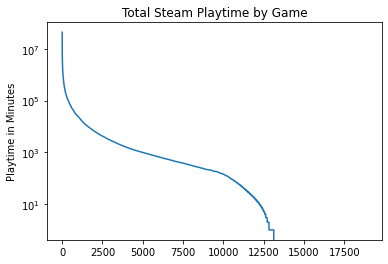

In [111]:
# Probably a good plot to add to the system.
user_recs_info = user_games.pivot(index="steamid", columns="appid", values="playtime_forever")
user_recs_info = user_recs_info.fillna(0)
print(sorted(user_recs_info.sum().tolist(), reverse=True)[0])
plt.plot(sorted(user_recs_info.sum().tolist(), reverse=True))
plt.yscale("log")
plt.title("Total Steam Playtime by Game")
plt.ylabel("Playtime in Minutes")

In [35]:
games_recs_info = user_games.pivot(index="appid", columns="steamid", values="playtime_forever")
games_recs_info = games_recs_info.fillna(0)
games_recs_info.head()

steamid,76561197960266237,76561197960266546,76561197960266692,76561197960267595,76561197960268310,76561197960268442,76561197960268641,76561197960268758,76561197960268997,76561197960269033,...,76561198084006035,76561198084007222,76561198086100320,76561198086106534,76561198086107396,76561198088193457,76561198088194864,76561198088203281,76561198088205103,76561198090302063
appid,,,,,,,,,,,,,,,,,,,,,
10,2707.0,8.0,1801.0,0.0,51.0,68817.0,32157.0,0.0,44.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,3318.0,58.0,69.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,270.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Playtime in Minutes')

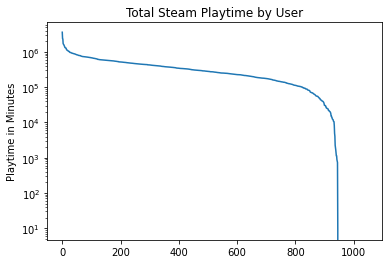

In [37]:
plt.plot(sorted(games_recs_info.sum().tolist(), reverse=True))
plt.yscale("log")
plt.title("Total Steam Playtime by User")
plt.ylabel("Playtime in Minutes")

3619783.0
3619783.0
412771.0


Text(0, 0.5, 'Playtime in Minutes')

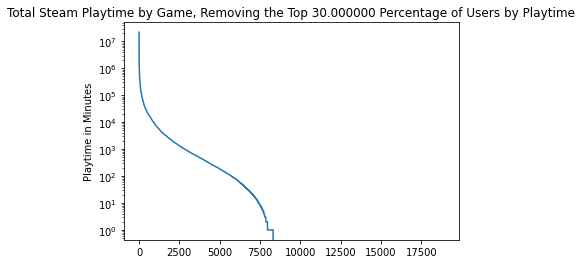

In [110]:
top_percentage = 0.3
top_rows = 1046*(1-top_percentage)
user_recs_heavy = user_games.pivot(index="steamid", columns="appid", values="playtime_forever")
user_recs_heavy = user_recs_heavy.fillna(0)
user_recs_heavy["total playtime"] = user_recs_heavy.sum(axis=1)
print(user_recs_heavy["total playtime"].max())
user_recs_heavy = user_recs_heavy.sort_values(by="total playtime", axis=0, ascending=True)
print(user_recs_heavy["total playtime"].max())
user_recs_heavy = user_recs_heavy.head(n=int(top_rows))
print(user_recs_heavy["total playtime"].max())

user_recs_heavy = user_recs_heavy.drop("total playtime", axis=1)

plt.plot(sorted(user_recs_heavy.sum().tolist(), reverse=True))
plt.yscale("log")
plt.title("Total Steam Playtime by Game, Removing the Top %f Percentage of Users by Playtime" % (top_percentage*100))
plt.ylabel("Playtime in Minutes")

/home/arav/.local/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


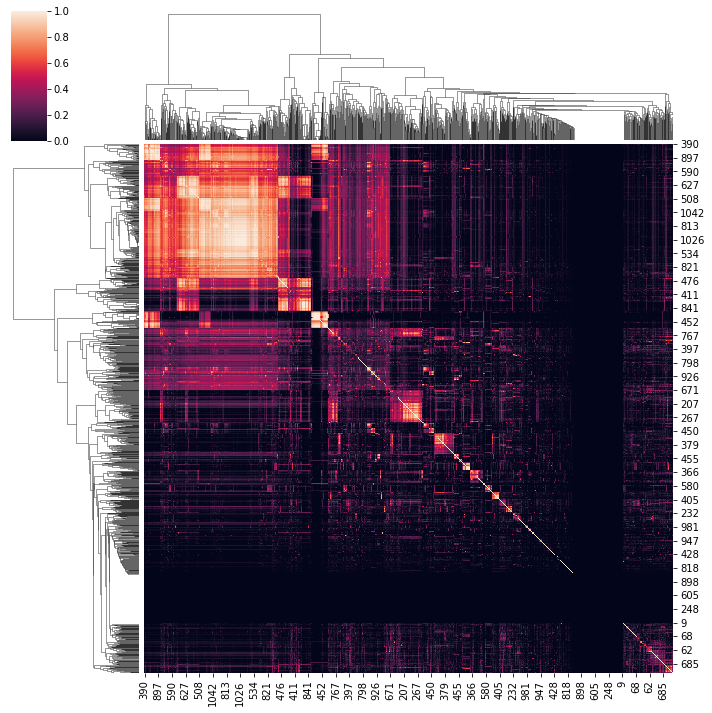

In [130]:
from sklearn.metrics.pairwise import cosine_similarity
pairwise_metrics = cosine_similarity(user_recs_info)
import seaborn as sns
sns.clustermap(pairwise_metrics)

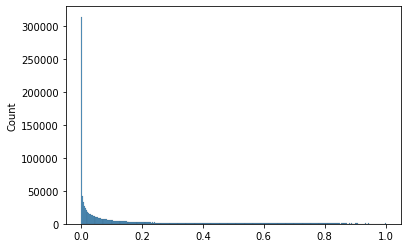

In [132]:
sns.histplot(pairwise_metrics.flatten())

In [156]:
# Manipulatable threshold
import networkx as nx
threshold = 0.4
pairwise_metrics_ths = np.copy(pairwise_metrics)
pairwise_metrics_ths[pairwise_metrics_ths <= threshold] = 0
pairwise_metrics_ths[pairwise_metrics_ths > threshold] = 1
G = nx.to_networkx_graph(pairwise_metrics_ths)
G = nx.relabel_nodes(G, {idx:elem for idx, elem in enumerate(list(user_recs_info.index))})
nx.write_gexf(G, "steam-data/similarity " + str(int(threshold*100)) + " percent.gexf")

In [165]:
# From the above plots, it looks like my method is accentuating people who play a lot of some games. 
# This actually makes it a great set of visualizations for that purpose

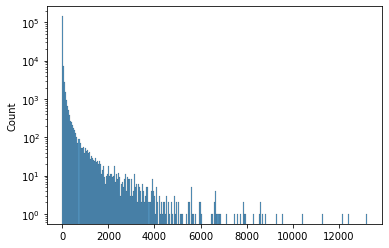

In [187]:
test = user_recs_info.to_numpy().flatten()
test = test[test > 0]/60
sns.histplot(test, bins=300, log_scale=(False,True))

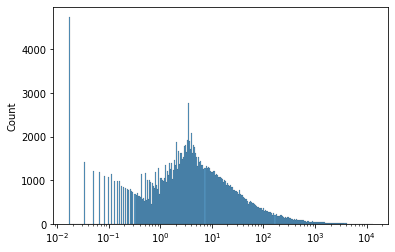

In [191]:
test = user_recs_info.to_numpy().flatten()
test = test[test > 0]/60
sns.histplot(test, bins=300, log_scale=(True,False))

/home/arav/.local/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


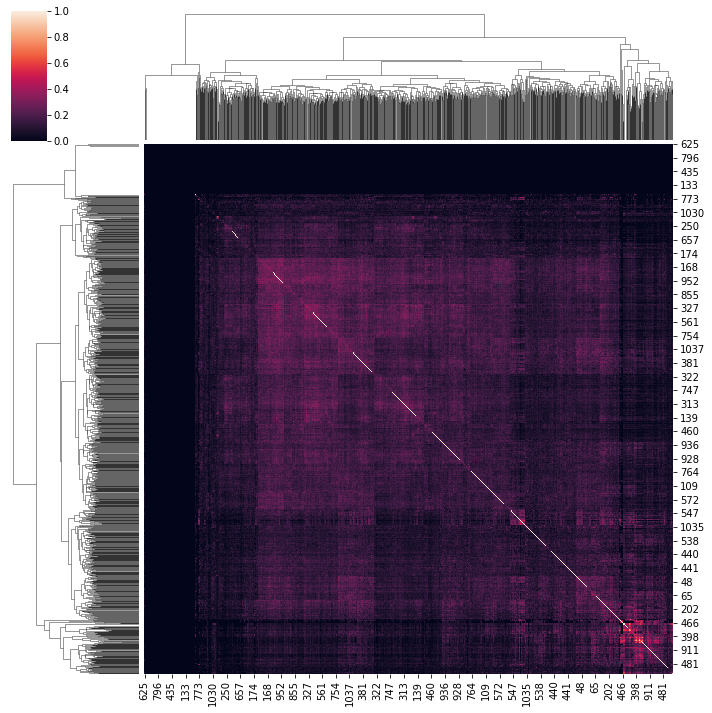

In [193]:
# From this, we'll assume that time above 5 hours indicates that they "like" the game
from sklearn.metrics.pairwise import cosine_similarity
user_recs_simpl = user_recs_info.copy()
user_recs_simpl[user_recs_simpl <= 5] = 0
user_recs_simpl[user_recs_simpl > 5] = 1
pairwise_metrics = cosine_similarity(user_recs_simpl)
import seaborn as sns
sns.clustermap(pairwise_metrics)

In [32]:
# Here, we have essentially a recommender system problem. Huh. ( We'll need to do something here, but for)
from sklearn.decomposition import NMF
model = NMF(n_components=20)
